# Wine type prediction!

Here in this tutorial we are using a dataset from University of California Irvine repository.The main objective of this tutorial to work with neural networks and how they work in real world. 

This wine dataset is one of the very known sets, which is frequently used to get started on learning how to work out machine learning problems. This tutorial will be carried out under deep learning using Python with Keras. 

# Data source:

white wine : http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

Red wine : http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

# Loading the data

In [32]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

# Data Exploration

Understanding the dataset is one of the important issues in any analysis. From this dataset, at least we know that there are two types of wine : red and white. Apart from them there are other features of the dataset which are directly or indirectly related with wine characteristics. So, it is always good to go through exploratory analysis of the dataset. 

In [6]:
# Print info on white wine
print(white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [7]:
# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [34]:
# First rows of `red` 
#red[:5]
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
# Last rows of `white`
#white[-5:]
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [10]:
# Describe `white`
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
# Is there any null vallues in the dataset?
print("Boolean: ", white.isnull().values.any(), "\n")

print(white.isnull().sum())

Boolean:  False 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [12]:
red.isnull().values.any()

False

In [36]:
# Shapes
red.shape

(1599, 12)

In [14]:
white.shape

(4898, 12)

# Alcohol

The Alcohol volume might be one of the important feature for wine quality! However, we can visualize the distributions of the % volume using visualization library. Here in this tutorial, we are going to use matplotlib to visualize the distribution. 

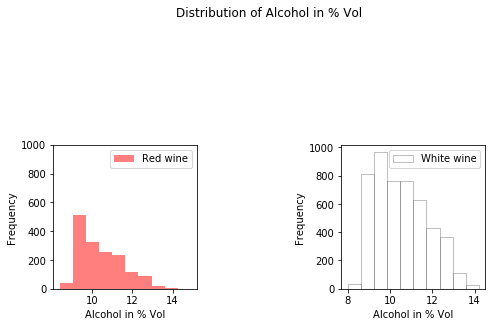

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

# Sulfates

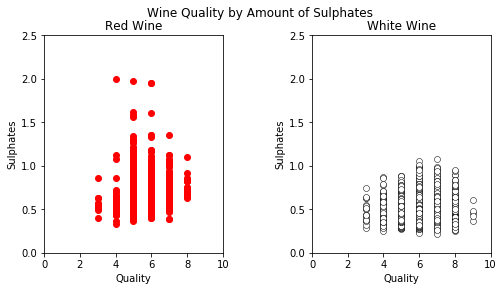

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

The red wine seems to contain more sulfates than the white wine. This could maybe explain the general saying that red wine causes headaches!

# Acidity

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

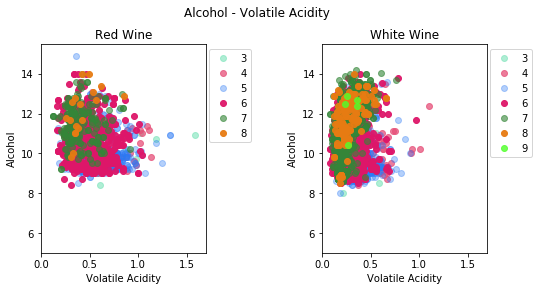

In [17]:
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

In the image above, you see that the levels that you have read about above especially hold for the white wine: most wines with label 8 have volatile acidity levels of 0.5 or below, but whether or not it has an effect on the quality is too difficult to say, since all the data points are very densely packed towards one side of the graph.

# Preprocess Data

Now, let´s preprocess the data towards neural network. 

In [18]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white["type"] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [19]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


### Correlation Matrix

/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


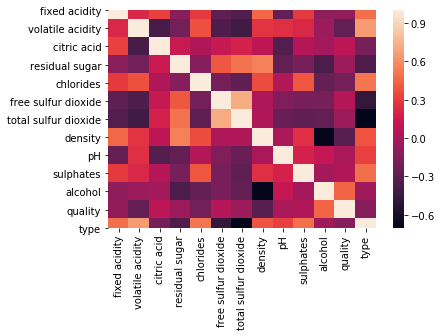

In [20]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# Data Spliting (Train-Test Sets)

In [21]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split


#Specify the data 
#X = wines[:,0:11]
X = wines.iloc[:,0:11]

# Specify the target labels and flatten the array
y= np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [22]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

# Model Data

In [23]:
# Import `Sequential` from `keras.models`
from tensorflow.python.keras.models import Sequential

# Import `Dense` from `keras.layers`
from tensorflow.python.keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer (Dense layer with 12 nodes for the input layer, relu activation function )
model.add( Dense ( 12, activation="relu" , input_shape=(11,)))

# Add one hidden layer (Dense layer with 8 nodes , relu activation function )
model.add(Dense (8, activation="relu"))

# Add an output layer (Dense layer with 1 node for the output layer, sigmoid activation function )
model.add(Dense (1, activation="sigmoid"))

# Compile and Fit

In [24]:
# Compilr the model with adam optimizer, 
#binary_crossentropy as a loss function, 
#and accuracy as metrics; put the metrics alsways in []
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
) 

In [37]:
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

Train on 5197 samples
Epoch 1/20
5197/5197 [==============================] - 6s 1ms/sample - loss: 0.0101 - accuracy: 0.9977
Epoch 2/20
5197/5197 [==============================] - 5s 996us/sample - loss: 0.0095 - accuracy: 0.9979
Epoch 3/20
5197/5197 [==============================] - 5s 981us/sample - loss: 0.0088 - accuracy: 0.9983
Epoch 4/20
5197/5197 [==============================] - 5s 968us/sample - loss: 0.0080 - accuracy: 0.9983
Epoch 5/20
5197/5197 [==============================] - 5s 974us/sample - loss: 0.0077 - accuracy: 0.9983
Epoch 6/20
5197/5197 [==============================] - 5s 981us/sample - loss: 0.0082 - accuracy: 0.9981
Epoch 7/20
5197/5197 [==============================] - 5s 997us/sample - loss: 0.0076 - accuracy: 0.9983
Epoch 8/20
5197/5197 [==============================] - 6s 1ms/sample - loss: 0.0082 - accuracy: 0.9981
Epoch 9/20
5197/5197 [==============================] - 5s 1ms/sample - loss: 0.0063 - accuracy: 0.9987
Epoch 10/20
5197/5197 [=======

# Predict Values

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred[:5]

array([[1.4751554e-03],
       [9.9993753e-01],
       [1.4901161e-06],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [40]:
y_test[:5]   # first 5 elements

array([0, 1, 0, 0, 0])

# Evaluate Model

In [41]:
score = model.evaluate(X_test, y_test, verbose=1)

print(score)

1300/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================